In [1]:
%pylab inline
from sharpy import *
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15, 10]

Populating the interactive namespace from numpy and matplotlib


In [2]:
m = SharadRadagramsManager()


In [3]:
m.loadDatabase()

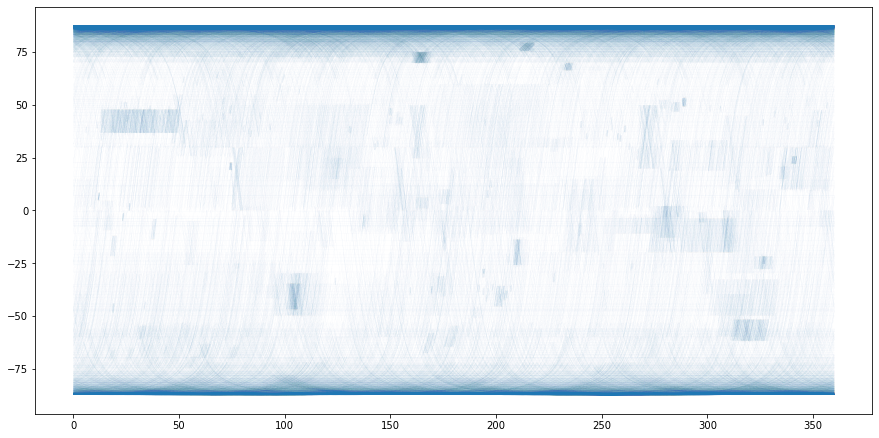

In [4]:
m.db.plot(linewidth=0.01)

In [35]:
m.db

,track_id,geometry
0,02391001,"LINESTRING (153.690 46.085, 153.499 44.953, 15..."
1,02390601,"LINESTRING (260.501 29.773, 260.300 28.314, 26..."
2,02395302,"LINESTRING (57.487 30.329, 57.337 29.251, 57.1..."
3,02396901,"LINESTRING (340.521 29.788, 340.239 27.702, 33..."
4,02395401,"LINESTRING (26.701 3.324, 26.287 -0.080)"
...,...,...
21866,01588701,"LINESTRING (327.268 -51.695, 327.081 -52.657, ..."
21867,01589701,"LINESTRING (230.374 -19.801, 230.100 -17.653, ..."
21868,01589101,"LINESTRING (218.023 79.326, 217.321 78.819, 21..."
21869,01588802,"LINESTRING (284.084 33.221, 283.866 31.684, 28..."


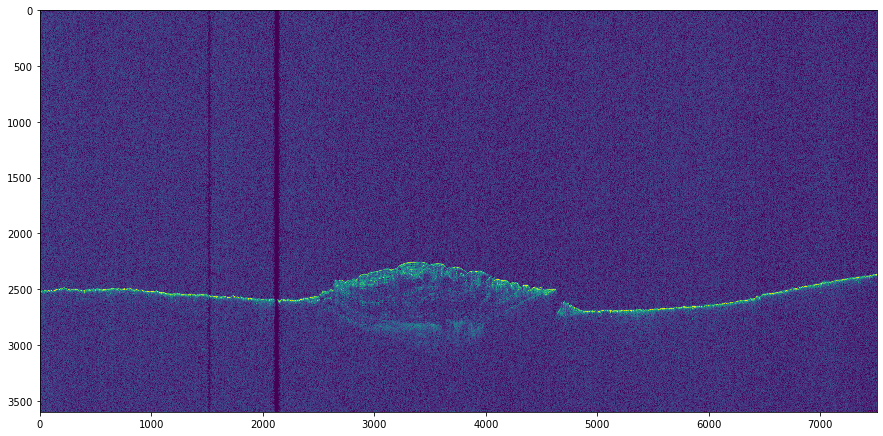

In [40]:
r =m.getRadargram("00555102")
img = r.getProduct("JPG")
imshow(img)

In [41]:
g = r.getProduct("GEOM").to_crs(north_pole_crs).geometry
pts = np.array([np.concatenate(a.coords.xy) for a in g])

3570064.0595151754


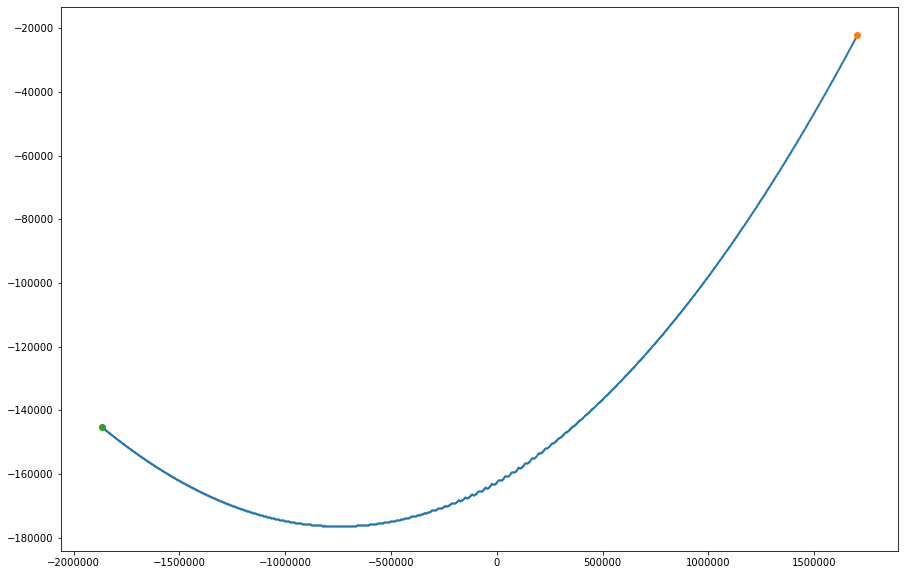

In [42]:
scatter(*pts.T, s=0.1)

start = pts[0]
end = pts[-1]

scatter(*start)
scatter(*end)

length = np.linalg.norm(end-start)
print(length)

In [43]:
nrows = 3600
ncols = img.shape[1]
print(ncols)

7505


In [44]:
scale = length / ncols
vlength = nrows * scale
print(vlength)


1712489.0891745011


In [45]:
import vtk
s = vtk.vtkPlaneSource()




In [46]:
origin = np.concatenate([start, [-vlength]])
p1 = np.concatenate([end, [-vlength]])
p2 = origin + np.array([0,0,vlength])

In [47]:
s.SetOrigin(origin)
s.SetPoint1(p1)
s.SetPoint2(p2)
s.Update()

pd = s.GetOutput()

w = vtk.vtkXMLPolyDataWriter()
w.SetFileName("file.vtp")
w.SetInputData(pd)
w.Update()